In [58]:
# The code was removed by Watson Studio for sharing.

#Week 4 Assignment
##Introduction/Business Problem

This report will examine the optimal site for an law office in Union or Essex Counties, New Jersey.  These counties were chosen as counties with a similar combination of urban and dense suburban municipalities.  The working assumption is a law office will be most successful where the neighborhood is similar to other neighborhoods with a successful bar, but where there is less competition.  There are two county seats in the area being reviewed, Newark and Elizabeth.  Because the Superior Court for each county is located in the county seat, there are generally a higher concentration of law near those sites, so we need to examing whether to adjust for that effect. Newark and Elizabeth both have multiple zip codes/neighborhoods, so we will need to identify the neighborhoods nearest the courthouse.

To do this analysis, we will retrieve location data for all zip codes in the two counties, examine FourSquare data for nearby shops and services, then look for neighborhoods that are similar to other neighborhoods in those counties that have a higher incidence than average of Lawyer venues, but themselves have a low incidence of Lawyer venues.  

#Week 4 Assignment 
##Data

This analysis used ZipExpress to retrieve zip codes by county. 

In [59]:
import pandas as pd 
union = pd.read_html("https://www.getzips.com/cgi-bin/ziplook.exe?What=3&County=union&State=NJ&Submit=Look+It+Up")[2]
essex = pd.read_html("https://www.getzips.com/cgi-bin/ziplook.exe?What=3&County=Essex&State=NJ&Submit=Look+It+Up")[2]
union=union.drop(0)
essex=essex.drop(0)
display(union.head())
display(essex.head())

0                1      2    3
1  07036       Linden, NJ  Union  908
2  07081  Springfield, NJ  Union  973
3  07083        Union, NJ  Union  908
4  07027      Garwood, NJ  Union  908
5  07033   Kenilworth, NJ  Union  908

0               1      2    3
1  07109  Belleville, NJ  Essex  973
2  07108      Newark, NJ  Essex  973
3  07110      Nutley, NJ  Essex  973
4  07112      Newark, NJ  Essex  973
5  07111   Irvington, NJ  Essex  973

The information for the two counties was then joined into a single dataframe.  Column names were added in the new dataframe. 

In [60]:
counties = union
counties=counties.append(essex)
counties.columns=['Zip','City','County','AreaCode']
counties

Zip                  City County AreaCode
1   07036            Linden, NJ  Union      908
2   07081       Springfield, NJ  Union      973
3   07083             Union, NJ  Union      908
4   07027           Garwood, NJ  Union      908
5   07033        Kenilworth, NJ  Union      908
6   07076     Scotch Plains, NJ  Union      908
7   07065            Rahway, NJ  Union      732
8   07063        Plainfield, NJ  Union      908
9   07062        Plainfield, NJ  Union      908
10  07060        Plainfield, NJ  Union      908
11  07061        Plainfield, NJ  Union      908
12  07066             Clark, NJ  Union      908
13  07091         Westfield, NJ  Union      908
14  07090         Westfield, NJ  Union      908
15  07201         Elizabeth, NJ  Union      908
16  07092      Mountainside, NJ  Union      908
17  07088          Vauxhall, NJ  Union      908
18  07902            Summit, NJ  Union      908
19  07901            Summit, NJ  Union      908
20  07016          Cranford, NJ  Union      908
21  07023           Fanwood, NJ  Union      908
22  07207         Elizabeth, NJ  Union      908
23  07206     Elizabethport, NJ  Union      908
24  07974    New Providence, NJ  Union      908
25  07208         Elizabeth, NJ  Union      908
26  07205          Hillside, NJ  Union      908
27  07203           Roselle, NJ  Union      908
28  07202         Elizabeth, NJ  Union      908
29  07204      Roselle Park, NJ  Union      908
30  07922  Berkeley Heights, NJ  Union      908
1   07109        Belleville, NJ  Essex      973
2   07108            Newark, NJ  Essex      973
3   07110            Nutley, NJ  Essex      973
4   07112            Newark, NJ  Essex      973
5   07111         Irvington, NJ  Essex      973
6   07107            Newark, NJ  Essex      973
7   07103            Newark, NJ  Essex      973
8   07102            Newark, NJ  Essex      973
9   07104            Newark, NJ  Essex      973
10  07106            Newark, NJ  Essex      973
11  07105            Newark, NJ  Essex      973
12  07193            Newark, NJ  Essex      973
13  07192            Newark, NJ  Essex      973
14  07195            Newark, NJ  Essex      973
15  07199            Newark, NJ  Essex      973
16  07198            Newark, NJ  Essex      973
17  07191            Newark, NJ  Essex      973
18  07175            Newark, NJ  Essex      973
19  07114            Newark, NJ  Essex      973
20  07184            Newark, NJ  Essex      973
21  07189            Newark, NJ  Essex      973
22  07188            Newark, NJ  Essex      973
23  07101            Newark, NJ  Essex      973
24  07019       East Orange, NJ  Essex      973
25  07003        Bloomfield, NJ  Essex      973
26  07021       Essex Fells, NJ  Essex      973
27  07039        Livingston, NJ  Essex      973
28  07028        Glen Ridge, NJ  Essex      973
29  07004         Fairfield, NJ  Essex      973
30  07017       East Orange, NJ  Essex      973
31  07018       East Orange, NJ  Essex      973
32  07009       Cedar Grove, NJ  Essex      973
33  07006          Caldwell, NJ  Essex      973
34  07007          Caldwell, NJ  Essex      973
35  07052       West Orange, NJ  Essex      973
36  07051            Orange, NJ  Essex      973
37  07068          Roseland, NJ  Essex      973
38  07079      South Orange, NJ  Essex      973
39  07078       Short Hills, NJ  Essex      973
40  07050            Orange, NJ  Essex      973
41  07041          Millburn, NJ  Essex      973
42  07040         Maplewood, NJ  Essex      973
43  07042         Montclair, NJ  Essex      973
44  07044            Verona, NJ  Essex      973
45  07043         Montclair, NJ  Essex      973

I obtained longitude and latitude information by postal code from http://download.geonames.org (http://download.geonames.org/export/zip/US.zip), and read them into a dataframe. 

In [61]:
# The code was removed by Watson Studio for sharing.

The latitude and longitude were added to the combined dataframe of zip codes by doing a lookup by zip code. 

In [62]:
counties['Latitude'] = list(codes.loc[counties['Zip']]['Latitude'])
counties['Longitude'] = list(codes.loc[counties['Zip']]['Longitude'])
counties['Neighborhood'] = counties['City'] + " " + counties['Zip']
counties[counties['Zip']=='07204']


Zip              City County AreaCode  Latitude  Longitude  \
29  07204  Roselle Park, NJ  Union      908   40.6651    -74.267   

              Neighborhood  
29  Roselle Park, NJ 07204

The result is information for 75 localities by zip code.

In [63]:
counties.shape

(75, 7)

In [64]:
counties.sort_values(['Latitude','Longitude'],inplace=True)
counties

Zip                  City County AreaCode  Latitude  Longitude  \
8   07063        Plainfield, NJ  Union      908   40.6048   -74.4427   
7   07065            Rahway, NJ  Union      732   40.6087   -74.2819   
10  07060        Plainfield, NJ  Union      908   40.6152   -74.4150   
12  07066             Clark, NJ  Union      908   40.6203   -74.3106   
9   07062        Plainfield, NJ  Union      908   40.6323   -74.3997   
1   07036            Linden, NJ  Union      908   40.6354   -74.2556   
6   07076     Scotch Plains, NJ  Union      908   40.6379   -74.3682   
21  07023           Fanwood, NJ  Union      908   40.6419   -74.3868   
14  07090         Westfield, NJ  Union      908   40.6479   -74.3451   
23  07206     Elizabethport, NJ  Union      908   40.6501   -74.1871   
4   07027           Garwood, NJ  Union      908   40.6512   -74.3239   
27  07203           Roselle, NJ  Union      908   40.6530   -74.2610   
20  07016          Cranford, NJ  Union      908   40.6554   -74.3057   
28  07202         Elizabeth, NJ  Union      908   40.6565   -74.2215   
22  07207         Elizabeth, NJ  Union      908   40.6640   -74.2107   
29  07204      Roselle Park, NJ  Union      908   40.6651   -74.2670   
11  07061        Plainfield, NJ  Union      908   40.6657   -74.2997   
13  07091         Westfield, NJ  Union      908   40.6657   -74.2997   
15  07201         Elizabeth, NJ  Union      908   40.6717   -74.2043   
25  07208         Elizabeth, NJ  Union      908   40.6747   -74.2239   
30  07922  Berkeley Heights, NJ  Union      908   40.6752   -74.4346   
5   07033        Kenilworth, NJ  Union      908   40.6759   -74.2944   
16  07092      Mountainside, NJ  Union      908   40.6785   -74.3588   
3   07083             Union, NJ  Union      908   40.6952   -74.2677   
26  07205          Hillside, NJ  Union      908   40.6968   -74.2281   
24  07974    New Providence, NJ  Union      908   40.7004   -74.4023   
2   07081       Springfield, NJ  Union      973   40.7015   -74.3227   
19  07114            Newark, NJ  Essex      973   40.7082   -74.1891   
4   07112            Newark, NJ  Essex      973   40.7107   -74.2131   
19  07901            Summit, NJ  Union      908   40.7149   -74.3642   
18  07902            Summit, NJ  Union      908   40.7156   -74.3647   
17  07088          Vauxhall, NJ  Union      908   40.7179   -74.2829   
41  07041          Millburn, NJ  Essex      973   40.7228   -74.3015   
2   07108            Newark, NJ  Essex      973   40.7236   -74.2015   
5   07111         Irvington, NJ  Essex      973   40.7261   -74.2313   
11  07105            Newark, NJ  Essex      973   40.7271   -74.1563   
42  07040         Maplewood, NJ  Essex      973   40.7279   -74.2656   
8   07102            Newark, NJ  Essex      973   40.7320   -74.1765   
12  07193            Newark, NJ  Essex      973   40.7357   -74.1724   
13  07192            Newark, NJ  Essex      973   40.7357   -74.1724   
14  07195            Newark, NJ  Essex      973   40.7357   -74.1724   
15  07199            Newark, NJ  Essex      973   40.7357   -74.1724   
18  07175            Newark, NJ  Essex      973   40.7357   -74.1724   
22  07188            Newark, NJ  Essex      973   40.7357   -74.1724   
23  07101            Newark, NJ  Essex      973   40.7361   -74.2251   
39  07078       Short Hills, NJ  Essex      973   40.7368   -74.3271   
7   07103            Newark, NJ  Essex      973   40.7370   -74.1964   
10  07106            Newark, NJ  Essex      973   40.7415   -74.2330   
38  07079      South Orange, NJ  Essex      973   40.7465   -74.2575   
31  07018       East Orange, NJ  Essex      973   40.7558   -74.2198   
6   07107            Newark, NJ  Essex      973   40.7607   -74.1882   
9   07104            Newark, NJ  Essex      973   40.7664   -74.1695   
24  07019       East Orange, NJ  Essex      973   40.7673   -74.2049   
40  07050            Orange, NJ  Essex      973   40.7692   -74.2355   
30  07017       East Orange, NJ  Essex      97

There are some zip codes that cover the same geographic territory (representing administrative differences), so the next step is to remove zip codes that are geographic duplicates.  These codes are removed so that geographic areas mith multiple codes don't have undue influence on the results. 

In [65]:
counties.drop_duplicates(subset=['Latitude','Longitude'],inplace=True)
counties.shape

(65, 7)

Installing libraries for further analysis. 

In [66]:
#install geopy
#!conda install -c conda-forge geopy --yes --debug # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy=1.13.0 --yes --debug # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda geopy --yes --debug # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#print("done")

In [67]:
#install folium 
#!conda install -c conda-forge folium=0.4.0 --yes --debug # uncomment this line if you haven't completed the Foursquare API lab
#!pip install folium
#import folium # map rendering library
#print("done")

In [68]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [69]:
CLIENT_ID = 'NVKUL15USCVWRI4MZGCL2XY2UZBVYF12D2BSBYENLELS2XQM' # your Foursquare ID
CLIENT_SECRET = '5W11RYKY003KS3RAGXU5JJ004R0D2QRRUONEMEHJIE1XAS5Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentials:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Adding code to look up shops and services near the center of the zip code area. 

In [70]:
CATEGORY = '4d4b7105d754a06378d81259' # Shop & Service
#CATEGORY = '52f2ab2ebcbc57f1066b8b3f' #lawyer
radius = 3000
LIMIT = 300

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
#        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#         url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&intent=browse&categoryId={}&client_secret={}&v={}&ll={},{}&limit={}'.format(            
            CLIENT_ID, 
            CATEGORY,
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        display(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Retrieving data specifically for shops and services, category ID 4d4b7105d754a06378d81259, within 300 meters. We are retricting to the most relevant category because of the limit of 100 returned venues by latitude and longitude.   

In [71]:


nj_venues = getNearbyVenues(names=counties['City'] + " " + counties.Zip,
                                   latitudes=counties['Latitude'],
                                   longitudes=counties['Longitude'],
                                   radius=200
                                  )
nj_venues.head()

Plainfield, NJ 07063


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5262d3dc498e25edb0c18b57',
   'name': 'Costco',
   'location': {'address': '1290 U.S. 22',
    'crossStreet': 'Between Rich and West End',
    'lat': 40.611939540347215,
    'lng': -74.45927109210693,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.611939540347215,
      'lng': -74.45927109210693}],
    'distance': 1610,
    'postalCode': '07060',
    'cc': 'US',
    'city': 'North Plainfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1290 U.S. 22 (Between Rich and West End)',
     'North Plainfield, NJ 07060',
     'United States']},
   'categories': [{'id': '52e816a6bcbc57f1066b7a54',
     'name': 'Warehouse Store',
     'pluralName': 'Warehouse Stores',
     'shortName': 'Warehouse Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_',
  

Rahway, NJ 07065


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '51eff5e5498ecf0cbee90069',
   'name': '7-Eleven',
   'location': {'address': '1100 St Georges Ave',
    'lat': 40.6083712601112,
    'lng': -74.2877456545829,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.6083712601112,
      'lng': -74.2877456545829}],
    'distance': 495,
    'postalCode': '07065',
    'cc': 'US',
    'city': 'Rahway',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1100 St Georges Ave',
     'Rahway, NJ 07065',
     'United States']},
   'categories': [{'id': '4d954b0ea243a5684a65b473',
     'name': 'Convenience Store',
     'pluralName': 'Convenience Stores',
     'shortName': 'Convenience Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0,

Plainfield, NJ 07060


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b9d3350f964a520d59836e3',
   'name': 'PetSmart',
   'location': {'address': '1515 US Highway 22',
    'crossStreet': 'at Watchung Square Mall',
    'lat': 40.6382912,
    'lng': -74.4230936,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.6382912,
      'lng': -74.4230936}],
    'distance': 2659,
    'postalCode': '07069',
    'cc': 'US',
    'city': 'Watchung',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1515 US Highway 22 (at Watchung Square Mall)',
     'Watchung, NJ 07069',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d100951735',
     'name': 'Pet Store',
     'pluralName': 'Pet Stores',
     'shortName': 'Pet Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pet_store_',
      'suffix': '.png'},
     'primary': True}],
   'p

Clark, NJ 07066


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5585b8c8498e080169b0fee4',
   'name': 'Clark Commons',
   'location': {'lat': 40.63134999277488,
    'lng': -74.30490327899506,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.63134999277488,
      'lng': -74.30490327899506}],
    'distance': 1320,
    'cc': 'US',
    'city': 'Clark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Clark, NJ', 'United States']},
   'categories': [{'id': '5744ccdfe4b0c0459246b4dc',
     'name': 'Shopping Plaza',
     'pluralName': 'Shopping Plazas',
     'shortName': 'Shopping Plaza',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-5585b8c8498e080169b0fee4-0'},
 {'reasons': {'count': 0,
   'items': [{'summary'

Plainfield, NJ 07062


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c01710df7ab0f47542016b6',
   'name': 'Fanwood Liquors',
   'location': {'address': '61 South Ave',
    'lat': 40.63683427151687,
    'lng': -74.39028739889774,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.63683427151687,
      'lng': -74.39028739889774},
     {'label': 'entrance', 'lat': 40.636924, 'lng': -74.389976}],
    'distance': 941,
    'postalCode': '07023',
    'cc': 'US',
    'city': 'Fanwood',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['61 South Ave',
     'Fanwood, NJ 07023',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix': '.png'},
     

Linden, NJ 07036


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b2fc3aef964a5206aef24e3',
   'name': 'Walgreens',
   'location': {'address': '22 E Saint Georges Ave',
    'lat': 40.63769321086111,
    'lng': -74.26343679428106,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.63769321086111,
      'lng': -74.26343679428106},
     {'label': 'entrance', 'lat': 40.637739, 'lng': -74.263703}],
    'distance': 709,
    'postalCode': '07036',
    'cc': 'US',
    'city': 'Linden',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['22 E Saint Georges Ave',
     'Linden, NJ 07036',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d10f951735',
     'name': 'Pharmacy',
     'pluralName': 'Pharmacies',
     'shortName': 'Pharmacy',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
      'suffix': '.png'},
     'p

Scotch Plains, NJ 07076


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bbe1f331416a59301adf33c',
   'name': 'Tom the Green Grocer',
   'location': {'address': '2305 S Ave',
    'lat': 40.64609547136653,
    'lng': -74.36968374026517,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.64609547136653,
      'lng': -74.36968374026517},
     {'label': 'entrance', 'lat': 40.646084, 'lng': -74.369721}],
    'distance': 920,
    'postalCode': '07076',
    'cc': 'US',
    'city': 'Scotch Plains',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['2305 S Ave',
     'Scotch Plains, NJ 07076',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f5941735',
     'name': 'Gourmet Shop',
     'pluralName': 'Gourmet Shops',
     'shortName': 'Gourmet',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_gourmet_',
      'suffix': '.png

Fanwood, NJ 07023


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c01710df7ab0f47542016b6',
   'name': 'Fanwood Liquors',
   'location': {'address': '61 South Ave',
    'lat': 40.63683427151687,
    'lng': -74.39028739889774,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.63683427151687,
      'lng': -74.39028739889774},
     {'label': 'entrance', 'lat': 40.636924, 'lng': -74.389976}],
    'distance': 636,
    'postalCode': '07023',
    'cc': 'US',
    'city': 'Fanwood',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['61 South Ave',
     'Fanwood, NJ 07023',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix': '.png'},
     

Westfield, NJ 07090


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a7a1177f964a52061e81fe3',
   'name': "Trader Joe's",
   'location': {'address': '155 Elm St',
    'crossStreet': 'E Broad St',
    'lat': 40.65196785125359,
    'lng': -74.34981820198048,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.65196785125359,
      'lng': -74.34981820198048},
     {'label': 'entrance', 'lat': 40.652465, 'lng': -74.34978}],
    'distance': 603,
    'postalCode': '07090',
    'cc': 'US',
    'city': 'Westfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['155 Elm St (E Broad St)',
     'Westfield, NJ 07090',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/

Elizabethport, NJ 07206


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a9ae129f964a520513320e3',
   'name': 'Neiman Marcus Last Call',
   'location': {'address': '651 Kapkowski Rd Ste 200',
    'crossStreet': 'at Jersey Gardens Blvd',
    'lat': 40.66012227451116,
    'lng': -74.17286573075158,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.66012227451116,
      'lng': -74.17286573075158}],
    'distance': 1640,
    'postalCode': '07201',
    'cc': 'US',
    'city': 'Elizabeth',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['651 Kapkowski Rd Ste 200 (at Jersey Gardens Blvd)',
     'Elizabeth, NJ 07201',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d103951735',
     'name': 'Clothing Store',
     'pluralName': 'Clothing Stores',
     'shortName': 'Apparel',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/appa

Garwood, NJ 07027


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4baf80eff964a52031053ce3',
   'name': 'Kings Food Markets',
   'location': {'address': '300 South Ave',
    'crossStreet': 'at Garwood Mall',
    'lat': 40.652232870667184,
    'lng': -74.32203292530528,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.652232870667184,
      'lng': -74.32203292530528}],
    'distance': 195,
    'postalCode': '07027',
    'cc': 'US',
    'city': 'Garwood',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['300 South Ave (at Garwood Mall)',
     'Garwood, NJ 07027',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
   

Roselle, NJ 07203


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b2fc3aef964a5206aef24e3',
   'name': 'Walgreens',
   'location': {'address': '22 E Saint Georges Ave',
    'lat': 40.63769321086111,
    'lng': -74.26343679428106,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.63769321086111,
      'lng': -74.26343679428106},
     {'label': 'entrance', 'lat': 40.637739, 'lng': -74.263703}],
    'distance': 1716,
    'postalCode': '07036',
    'cc': 'US',
    'city': 'Linden',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['22 E Saint Georges Ave',
     'Linden, NJ 07036',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d10f951735',
     'name': 'Pharmacy',
     'pluralName': 'Pharmacies',
     'shortName': 'Pharmacy',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
      'suffix': '.png'},
     '

Cranford, NJ 07016


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53f66cd7498e48ede4a05746',
   'name': 'Pastosa Ravioli',
   'location': {'lat': 40.65470460951825,
    'lng': -74.30224675896211,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.65470460951825,
      'lng': -74.30224675896211}],
    'distance': 301,
    'cc': 'US',
    'city': 'Cranford',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Cranford, NJ', 'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f5941735',
     'name': 'Gourmet Shop',
     'pluralName': 'Gourmet Shops',
     'shortName': 'Gourmet',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_gourmet_',
      'suffix': '.png'},
     'primary': True}],
   'delivery': {'id': '1521336',
    'url': 'https://www.grubhub.com/restaurant/pastosa-ravioli-200-south-avenue-east-cranford/1521336?aff

Elizabeth, NJ 07202


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b604c9ef964a52059de29e3',
   'name': 'Bayway World of Liquors',
   'location': {'address': '639 Bayway Ave',
    'lat': 40.64695916337045,
    'lng': -74.21543063812018,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.64695916337045,
      'lng': -74.21543063812018},
     {'label': 'entrance', 'lat': 40.646894, 'lng': -74.215422}],
    'distance': 1179,
    'postalCode': '07202',
    'cc': 'US',
    'city': 'Elizabeth',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['639 Bayway Ave',
     'Elizabeth, NJ 07202',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix

Elizabeth, NJ 07207


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5154d02ce4b0913f3b549891',
   'name': 'Wawa',
   'location': {'address': '595 Spring St',
    'lat': 40.672943,
    'lng': -74.199621,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.672943,
      'lng': -74.199621}],
    'distance': 1366,
    'postalCode': '07201',
    'cc': 'US',
    'city': 'Elizabeth',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['595 Spring St',
     'Elizabeth, NJ 07201',
     'United States']},
   'categories': [{'id': '4d954b0ea243a5684a65b473',
     'name': 'Convenience Store',
     'pluralName': 'Convenience Stores',
     'shortName': 'Convenience Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_',
      'suffix': '.png'},
     'primary': True}],
   'delivery': {'id': '1337923',
    'url': 'https://www.grubh

Roselle Park, NJ 07204


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c2b79392219c92870a3a448',
   'name': 'Family Dollar',
   'location': {'address': '7 E Westfield Ave',
    'lat': 40.66182572724883,
    'lng': -74.26336773236987,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.66182572724883,
      'lng': -74.26336773236987}],
    'distance': 476,
    'postalCode': '07204',
    'cc': 'US',
    'city': 'Roselle Park',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['7 E Westfield Ave',
     'Roselle Park, NJ 07204',
     'United States']},
   'categories': [{'id': '52dea92d3cf9994f4e043dbb',
     'name': 'Discount Store',
     'pluralName': 'Discount Stores',
     'shortName': 'Discount Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/discountstore_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count

Plainfield, NJ 07061


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53f66cd7498e48ede4a05746',
   'name': 'Pastosa Ravioli',
   'location': {'lat': 40.65470460951825,
    'lng': -74.30224675896211,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.65470460951825,
      'lng': -74.30224675896211}],
    'distance': 1242,
    'cc': 'US',
    'city': 'Cranford',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Cranford, NJ', 'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f5941735',
     'name': 'Gourmet Shop',
     'pluralName': 'Gourmet Shops',
     'shortName': 'Gourmet',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_gourmet_',
      'suffix': '.png'},
     'primary': True}],
   'delivery': {'id': '1521336',
    'url': 'https://www.grubhub.com/restaurant/pastosa-ravioli-200-south-avenue-east-cranford/1521336?af

Elizabeth, NJ 07201


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5154d02ce4b0913f3b549891',
   'name': 'Wawa',
   'location': {'address': '595 Spring St',
    'lat': 40.672943,
    'lng': -74.199621,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.672943,
      'lng': -74.199621}],
    'distance': 418,
    'postalCode': '07201',
    'cc': 'US',
    'city': 'Elizabeth',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['595 Spring St',
     'Elizabeth, NJ 07201',
     'United States']},
   'categories': [{'id': '4d954b0ea243a5684a65b473',
     'name': 'Convenience Store',
     'pluralName': 'Convenience Stores',
     'shortName': 'Convenience Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_',
      'suffix': '.png'},
     'primary': True}],
   'delivery': {'id': '1337923',
    'url': 'https://www.grubhu

Elizabeth, NJ 07208


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8b76498e72c8c44c199b',
   'name': 'Food Bazaar Supermarket',
   'location': {'address': '211 Elmora Ave',
    'crossStreet': 'Grand St',
    'lat': 40.664499859485005,
    'lng': -74.23184501874606,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.664499859485005,
      'lng': -74.23184501874606}],
    'distance': 1318,
    'postalCode': '07202',
    'cc': 'US',
    'city': 'Elizabeth',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['211 Elmora Ave (Grand St)',
     'Elizabeth, NJ 07202',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     

Berkeley Heights, NJ 07922


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53887829498e1819184b9d47',
   'name': 'Central Farmers Market',
   'location': {'address': '598 Central Ave',
    'crossStreet': 'Chanlon Rd',
    'lat': 40.6972078760738,
    'lng': -74.40536410873142,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.6972078760738,
      'lng': -74.40536410873142}],
    'distance': 3477,
    'postalCode': '07974',
    'cc': 'US',
    'city': 'New Providence',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['598 Central Ave (Chanlon Rd)',
     'New Providence, NJ 07974',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1fa941735',
     'name': 'Farmers Market',
     'pluralName': 'Farmers Markets',
     'shortName': "Farmer's Market",
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_farmersmarket_',
      'su

Kenilworth, NJ 07033


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b50efc0f964a520783927e3',
   'name': 'Total Wine & More',
   'location': {'address': '950 Springfield Rd',
    'crossStreet': 'at Route 22 E',
    'lat': 40.6886596,
    'lng': -74.2992839,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.6886596,
      'lng': -74.2992839}],
    'distance': 1479,
    'postalCode': '07083',
    'cc': 'US',
    'city': 'Union',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['950 Springfield Rd (at Route 22 E)',
     'Union, NJ 07083',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'cou

Mountainside, NJ 07092


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c38a98a1e06d13ab01c783e',
   'name': 'Vine Republic Mountainside',
   'location': {'address': '1267 US Highway 22',
    'crossStreet': 'Mountain Ave',
    'lat': 40.67331417949738,
    'lng': -74.35030727747005,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.67331417949738,
      'lng': -74.35030727747005}],
    'distance': 920,
    'postalCode': '07092',
    'cc': 'US',
    'city': 'Mountainside',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1267 US Highway 22 (Mountain Ave)',
     'Mountainside, NJ 07092',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffi

Union, NJ 07083


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4dd7f3511838b8561cf41b90',
   'name': "Aarti's world discount liquors",
   'location': {'address': '1675 US Highway 22 W',
    'lat': 40.696937768672974,
    'lng': -74.25408100293023,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.696937768672974,
      'lng': -74.25408100293023}],
    'distance': 1165,
    'postalCode': '07083',
    'cc': 'US',
    'city': 'Union',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1675 US Highway 22 W',
     'Union, NJ 07083',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'c

Hillside, NJ 07205


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '50a28a5ee4b0fffeb79ab276',
   'name': 'Walgreens',
   'location': {'address': '1311 Morris Ave',
    'lat': 40.68792412351218,
    'lng': -74.24233145554348,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.68792412351218,
      'lng': -74.24233145554348}],
    'distance': 1555,
    'postalCode': '07083',
    'cc': 'US',
    'city': 'Union',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1311 Morris Ave',
     'Union, NJ 07083',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d10f951735',
     'name': 'Pharmacy',
     'pluralName': 'Pharmacies',
     'shortName': 'Pharmacy',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-

New Providence, NJ 07974


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '53887829498e1819184b9d47',
   'name': 'Central Farmers Market',
   'location': {'address': '598 Central Ave',
    'crossStreet': 'Chanlon Rd',
    'lat': 40.6972078760738,
    'lng': -74.40536410873142,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.6972078760738,
      'lng': -74.40536410873142}],
    'distance': 439,
    'postalCode': '07974',
    'cc': 'US',
    'city': 'New Providence',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['598 Central Ave (Chanlon Rd)',
     'New Providence, NJ 07974',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1fa941735',
     'name': 'Farmers Market',
     'pluralName': 'Farmers Markets',
     'shortName': "Farmer's Market",
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_farmersmarket_',
      'suf

Springfield, NJ 07081


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a8efcbcf964a520791320e3',
   'name': 'Wine Library',
   'location': {'address': '586 Morris Ave # NJ-124',
    'crossStreet': 'Millburn Ave',
    'lat': 40.71700360910418,
    'lng': -74.32459893837341,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.71700360910418,
      'lng': -74.32459893837341}],
    'distance': 1733,
    'postalCode': '07081',
    'cc': 'US',
    'city': 'Springfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['586 Morris Ave # NJ-124 (Millburn Ave)',
     'Springfield, NJ 07081',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},

Newark, NJ 07114


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '55b19588498e095bff38d3e7',
   'name': 'Railroad Cigars',
   'location': {'address': '188 Pulaski St',
    'crossStreet': 'Clifford Street',
    'lat': 40.7187162595018,
    'lng': -74.16051204618272,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7187162595018,
      'lng': -74.16051204618272},
     {'label': 'entrance', 'lat': 40.718775, 'lng': -74.160511}],
    'distance': 2681,
    'postalCode': '07105',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['188 Pulaski St (Clifford Street)',
     'Newark, NJ 07105',
     'United States']},
   'categories': [{'id': '5453de49498eade8af355881',
     'name': 'Business Service',
     'pluralName': 'Business Services',
     'shortName': 'Business Services',
     'icon': {'prefix': 'https://ss3.4sqi.net

Newark, NJ 07112


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8bafcd109214748d89dd',
   'name': 'SuperFresh Supermarket',
   'location': {'address': '471 Lyons Ave',
    'lat': 40.716162275995494,
    'lng': -74.22335722324122,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.716162275995494,
      'lng': -74.22335722324122}],
    'distance': 1057,
    'postalCode': '07111',
    'cc': 'US',
    'city': 'Irvington',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['471 Lyons Ave',
     'Irvington, NJ 07111',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 

Summit, NJ 07901


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c0ba0ad7e3fc928c884f582',
   'name': 'Summit Farmers Market',
   'location': {'address': 'DeForest Avenue & Beechwood',
    'crossStreet': 'Summit Bank parking lot',
    'lat': 40.71871051456713,
    'lng': -74.35879602084398,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.71871051456713,
      'lng': -74.35879602084398}],
    'distance': 622,
    'postalCode': '07901',
    'cc': 'US',
    'city': 'Summit',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['DeForest Avenue & Beechwood (Summit Bank parking lot)',
     'Summit, NJ 07901',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1fa941735',
     'name': 'Farmers Market',
     'pluralName': 'Farmers Markets',
     'shortName': "Farmer's Market",
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/sho

Summit, NJ 07902


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c0ba0ad7e3fc928c884f582',
   'name': 'Summit Farmers Market',
   'location': {'address': 'DeForest Avenue & Beechwood',
    'crossStreet': 'Summit Bank parking lot',
    'lat': 40.71871051456713,
    'lng': -74.35879602084398,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.71871051456713,
      'lng': -74.35879602084398}],
    'distance': 606,
    'postalCode': '07901',
    'cc': 'US',
    'city': 'Summit',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['DeForest Avenue & Beechwood (Summit Bank parking lot)',
     'Summit, NJ 07901',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1fa941735',
     'name': 'Farmers Market',
     'pluralName': 'Farmers Markets',
     'shortName': "Farmer's Market",
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/sho

Vauxhall, NJ 07088


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a64ca9af964a520b2c61fe3',
   'name': 'Whole Foods Market',
   'location': {'address': '2245 Springfield Ave.',
    'crossStreet': 'Marion St',
    'lat': 40.7170552041893,
    'lng': -74.28654430825806,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7170552041893,
      'lng': -74.28654430825806}],
    'distance': 321,
    'postalCode': '07088',
    'cc': 'US',
    'city': 'Vauxhall',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['2245 Springfield Ave. (Marion St)',
     'Vauxhall, NJ 07088',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
 

Millburn, NJ 07041


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4af5ff31f964a520f2ff21e3',
   'name': "Trader Joe's",
   'location': {'address': '187 Millburn Ave',
    'lat': 40.72279668901444,
    'lng': -74.29582759743687,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.72279668901444,
      'lng': -74.29582759743687},
     {'label': 'entrance', 'lat': 40.723017, 'lng': -74.296642}],
    'distance': 478,
    'postalCode': '07041',
    'cc': 'US',
    'city': 'Millburn',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['187 Millburn Ave',
     'Millburn, NJ 07041',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.p

Newark, NJ 07108


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4ce8133ae1eeb60c2507a1ae',
   'name': 'Home Liquors',
   'location': {'address': 'Springfield Ave',
    'crossStreet': 'S 16Th St',
    'lat': 40.731042371810695,
    'lng': -74.21082878218674,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.731042371810695,
      'lng': -74.21082878218674},
     {'label': 'entrance', 'lat': 40.730345, 'lng': -74.209952}],
    'distance': 1142,
    'postalCode': '07103',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Springfield Ave (S 16Th St)',
     'Newark, NJ 07103',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/sho

Irvington, NJ 07111


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8bafcd109214748d89dd',
   'name': 'SuperFresh Supermarket',
   'location': {'address': '471 Lyons Ave',
    'lat': 40.716162275995494,
    'lng': -74.22335722324122,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.716162275995494,
      'lng': -74.22335722324122}],
    'distance': 1293,
    'postalCode': '07111',
    'cc': 'US',
    'city': 'Irvington',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['471 Lyons Ave',
     'Irvington, NJ 07111',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 

Newark, NJ 07105


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c2bacbcb34ad13a6b29eace',
   'name': "Seabra's Supermarket",
   'location': {'address': '260 Lafayette St',
    'crossStreet': 'Btw Madison & Monroe',
    'lat': 40.728272218932446,
    'lng': -74.16103214776868,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.728272218932446,
      'lng': -74.16103214776868},
     {'label': 'entrance', 'lat': 40.728087, 'lng': -74.161171}],
    'distance': 419,
    'postalCode': '07105',
    'cc': 'US',
    'neighborhood': 'North Ironbound',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['260 Lafayette St (Btw Madison & Monroe)',
     'Newark, NJ 07105',
     'United States']},
   'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
     'name': 'Supermarket',
     'pluralName': 'Supermarkets',
     'shortName': 'Supermarket',


Maplewood, NJ 07040


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5679e6bb498ed76811bd1ecc',
   'name': 'Wine Barrel',
   'location': {'address': '1886 Springfield Ave',
    'lat': 40.72069430979747,
    'lng': -74.27066692066698,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.72069430979747,
      'lng': -74.27066692066698},
     {'label': 'entrance', 'lat': 40.720717, 'lng': -74.270453}],
    'distance': 908,
    'postalCode': '07040',
    'cc': 'US',
    'city': 'Maplewood',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['1886 Springfield Ave',
     'Maplewood, NJ 07040',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix'

Newark, NJ 07102


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c562157973fc9287c5277c8',
   'name': 'Barnabas Health Hockey House',
   'location': {'address': '165 Mulberry St',
    'crossStreet': 'at Lafayette St',
    'lat': 40.73268473501239,
    'lng': -74.17170806516359,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.73268473501239,
      'lng': -74.17170806516359}],
    'distance': 411,
    'postalCode': '07102',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['165 Mulberry St (at Lafayette St)',
     'Newark, NJ 07102',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f2941735',
     'name': 'Sporting Goods Shop',
     'pluralName': 'Sporting Goods Shops',
     'shortName': 'Sporting Goods',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_',
  

Newark, NJ 07193


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c562157973fc9287c5277c8',
   'name': 'Barnabas Health Hockey House',
   'location': {'address': '165 Mulberry St',
    'crossStreet': 'at Lafayette St',
    'lat': 40.73268473501239,
    'lng': -74.17170806516359,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.73268473501239,
      'lng': -74.17170806516359}],
    'distance': 340,
    'postalCode': '07102',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['165 Mulberry St (at Lafayette St)',
     'Newark, NJ 07102',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f2941735',
     'name': 'Sporting Goods Shop',
     'pluralName': 'Sporting Goods Shops',
     'shortName': 'Sporting Goods',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_',
  

Newark, NJ 07101


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4ce8133ae1eeb60c2507a1ae',
   'name': 'Home Liquors',
   'location': {'address': 'Springfield Ave',
    'crossStreet': 'S 16Th St',
    'lat': 40.731042371810695,
    'lng': -74.21082878218674,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.731042371810695,
      'lng': -74.21082878218674},
     {'label': 'entrance', 'lat': 40.730345, 'lng': -74.209952}],
    'distance': 1328,
    'postalCode': '07103',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Springfield Ave (S 16Th St)',
     'Newark, NJ 07103',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/sho

Short Hills, NJ 07078


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a8efcbcf964a520791320e3',
   'name': 'Wine Library',
   'location': {'address': '586 Morris Ave # NJ-124',
    'crossStreet': 'Millburn Ave',
    'lat': 40.71700360910418,
    'lng': -74.32459893837341,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.71700360910418,
      'lng': -74.32459893837341}],
    'distance': 2213,
    'postalCode': '07081',
    'cc': 'US',
    'city': 'Springfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['586 Morris Ave # NJ-124 (Millburn Ave)',
     'Springfield, NJ 07081',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},

Newark, NJ 07103


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '560c4636498e4f7e6e4562f1',
   'name': 'ShopRite',
   'location': {'address': '206 Springfield Ave',
    'lat': 40.736425832850784,
    'lng': -74.18627919865526,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.736425832850784,
      'lng': -74.18627919865526}],
    'distance': 856,
    'postalCode': '07103',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['206 Springfield Ave',
     'Newark, NJ 07103',
     'United States']},
   'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
     'name': 'Supermarket',
     'pluralName': 'Supermarkets',
     'shortName': 'Supermarket',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},

Newark, NJ 07106


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4ce8133ae1eeb60c2507a1ae',
   'name': 'Home Liquors',
   'location': {'address': 'Springfield Ave',
    'crossStreet': 'S 16Th St',
    'lat': 40.731042371810695,
    'lng': -74.21082878218674,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.731042371810695,
      'lng': -74.21082878218674},
     {'label': 'entrance', 'lat': 40.730345, 'lng': -74.209952}],
    'distance': 2202,
    'postalCode': '07103',
    'cc': 'US',
    'city': 'Newark',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Springfield Ave (S 16Th St)',
     'Newark, NJ 07103',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/sho

South Orange, NJ 07079


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '51eaa953498e0c4a2fcd1080',
   'name': '7-Eleven',
   'location': {'address': '60 Valley St',
    'lat': 40.7447083,
    'lng': -74.2591943,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7447083,
      'lng': -74.2591943}],
    'distance': 245,
    'postalCode': '07079',
    'cc': 'US',
    'city': 'South Orange',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['60 Valley St',
     'South Orange, NJ 07079',
     'United States']},
   'categories': [{'id': '4d954b0ea243a5684a65b473',
     'name': 'Convenience Store',
     'pluralName': 'Convenience Stores',
     'shortName': 'Convenience Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referr

East Orange, NJ 07018


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bf0560cc8d920a1fcb49430',
   'name': 'Walgreens',
   'location': {'address': '240-250 Central Ave',
    'lat': 40.7650714,
    'lng': -74.2329769,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7650714,
      'lng': -74.2329769}],
    'distance': 1516,
    'postalCode': '07050',
    'cc': 'US',
    'city': 'Orange',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['240-250 Central Ave',
     'Orange, NJ 07050',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d10f951735',
     'name': 'Pharmacy',
     'pluralName': 'Pharmacies',
     'shortName': 'Pharmacy',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4bf0560cc8d920a1fc

Newark, NJ 07107


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8933498e50ff83219e8b',
   'name': 'Food World SuperFresh',
   'location': {'address': '115 Belmont Ave',
    'lat': 40.778945639487205,
    'lng': -74.18409422117792,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.778945639487205,
      'lng': -74.18409422117792}],
    'distance': 2060,
    'postalCode': '07109',
    'cc': 'US',
    'city': 'Belleville',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['115 Belmont Ave',
     'Belleville, NJ 07109',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count'

Newark, NJ 07104


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8933498e50ff83219e8b',
   'name': 'Food World SuperFresh',
   'location': {'address': '115 Belmont Ave',
    'lat': 40.778945639487205,
    'lng': -74.18409422117792,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.778945639487205,
      'lng': -74.18409422117792}],
    'distance': 1861,
    'postalCode': '07109',
    'cc': 'US',
    'city': 'Belleville',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['115 Belmont Ave',
     'Belleville, NJ 07109',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count'

East Orange, NJ 07019


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8933498e50ff83219e8b',
   'name': 'Food World SuperFresh',
   'location': {'address': '115 Belmont Ave',
    'lat': 40.778945639487205,
    'lng': -74.18409422117792,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.778945639487205,
      'lng': -74.18409422117792}],
    'distance': 2181,
    'postalCode': '07109',
    'cc': 'US',
    'city': 'Belleville',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['115 Belmont Ave',
     'Belleville, NJ 07109',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count'

Orange, NJ 07050


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bf0560cc8d920a1fcb49430',
   'name': 'Walgreens',
   'location': {'address': '240-250 Central Ave',
    'lat': 40.7650714,
    'lng': -74.2329769,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7650714,
      'lng': -74.2329769}],
    'distance': 506,
    'postalCode': '07050',
    'cc': 'US',
    'city': 'Orange',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['240-250 Central Ave',
     'Orange, NJ 07050',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d10f951735',
     'name': 'Pharmacy',
     'pluralName': 'Pharmacies',
     'shortName': 'Pharmacy',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4bf0560cc8d920a1fcb

East Orange, NJ 07017


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '576c8933498e50ff83219e8b',
   'name': 'Food World SuperFresh',
   'location': {'address': '115 Belmont Ave',
    'lat': 40.778945639487205,
    'lng': -74.18409422117792,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.778945639487205,
      'lng': -74.18409422117792}],
    'distance': 2245,
    'postalCode': '07109',
    'cc': 'US',
    'city': 'Belleville',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['115 Belmont Ave',
     'Belleville, NJ 07109',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count'

West Orange, NJ 07052


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b3d190cf964a520e08d25e3',
   'name': 'Total Wine & More',
   'location': {'address': '495 Prospect Ave',
    'crossStreet': 'in Essex Green Shopping Center',
    'lat': 40.7934975,
    'lng': -74.2564449,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7934975,
      'lng': -74.2564449}],
    'distance': 846,
    'postalCode': '07052',
    'cc': 'US',
    'city': 'West Orange',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['495 Prospect Ave (in Essex Green Shopping Center)',
     'West Orange, NJ 07052',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},
 

Livingston, NJ 07039


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bdc6a5e2a3a0f47cbb9b2b6',
   'name': 'New World Manga - Comics Cards Games',
   'location': {'address': '93 E Mount Pleasant Ave',
    'lat': 40.79684927625372,
    'lng': -74.31111679459238,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.79684927625372,
      'lng': -74.31111679459238}],
    'distance': 1112,
    'postalCode': '07039',
    'cc': 'US',
    'city': 'Livingston',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['93 E Mount Pleasant Ave',
     'Livingston, NJ 07039',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1f3941735',
     'name': 'Toy / Game Store',
     'pluralName': 'Toy / Game Stores',
     'shortName': 'Toys & Games',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/toys_',
      'suffix': '.png'},
     'primary': Tru

Newark, NJ 07198


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b3d190cf964a520e08d25e3',
   'name': 'Total Wine & More',
   'location': {'address': '495 Prospect Ave',
    'crossStreet': 'in Essex Green Shopping Center',
    'lat': 40.7934975,
    'lng': -74.2564449,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7934975,
      'lng': -74.2564449}],
    'distance': 966,
    'postalCode': '07052',
    'cc': 'US',
    'city': 'West Orange',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['495 Prospect Ave (in Essex Green Shopping Center)',
     'West Orange, NJ 07052',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},
 

Belleville, NJ 07109


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '572baefa498e58614562b6c3',
   'name': 'Super Fresh " Food World "',
   'location': {'address': '19 Belleville Ave',
    'lat': 40.79707880472702,
    'lng': -74.17965870121269,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.79707880472702,
      'lng': -74.17965870121269}],
    'distance': 1422,
    'postalCode': '07003',
    'cc': 'US',
    'city': 'Bloomfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['19 Belleville Ave',
     'Bloomfield, NJ 07003',
     'United States']},
   'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
     'name': 'Supermarket',
     'pluralName': 'Supermarkets',
     'shortName': 'Supermarket',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count

Bloomfield, NJ 07003


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bbfa1ba74a9a59341cccef6',
   'name': "Sanj's Smoke Shop",
   'location': {'lat': 40.80779507679417,
    'lng': -74.19224548382,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.80779507679417,
      'lng': -74.19224548382},
     {'label': 'entrance', 'lat': 40.807832, 'lng': -74.192216}],
    'distance': 546,
    'postalCode': '07003',
    'cc': 'US',
    'city': 'Bloomfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['Bloomfield, NJ 07003', 'United States']},
   'categories': [{'id': '4bf58dd8d48988d123951735',
     'name': 'Smoke Shop',
     'pluralName': 'Smoke Shops',
     'shortName': 'Smoke Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/tobacco_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'r

Glen Ridge, NJ 07028


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5269958d498e57873389aacd',
   'name': 'European Wax Center',
   'location': {'address': '15 Bloomfield Ave',
    'lat': 40.80604605336422,
    'lng': -74.20807702388119,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.80604605336422,
      'lng': -74.20807702388119}],
    'distance': 314,
    'postalCode': '07042',
    'cc': 'US',
    'city': 'Montclair',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['15 Bloomfield Ave',
     'Montclair, NJ 07042',
     'United States']},
   'categories': [{'id': '54541900498ea6ccd0202697',
     'name': 'Health & Beauty Service',
     'pluralName': 'Health & Beauty Services',
     'shortName': 'Health & Beauty',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
      'suffix': '.png'},
     'primary': True}],
  

Montclair, NJ 07042


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b845fe8f964a520a13131e3',
   'name': 'Amanti Vino',
   'location': {'address': '30 Church St',
    'lat': 40.81394812050306,
    'lng': -74.21893916100419,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.81394812050306,
      'lng': -74.21893916100419},
     {'label': 'entrance', 'lat': 40.813887, 'lng': -74.21907}],
    'distance': 226,
    'postalCode': '07042',
    'cc': 'US',
    'city': 'Montclair',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['30 Church St',
     'Montclair, NJ 07042',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d119951735',
     'name': 'Wine Shop',
     'pluralName': 'Wine Shops',
     'shortName': 'Wine Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_wineshop_',
      'suffix': '.png'},
     'primary

Nutley, NJ 07110


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '509a7419e4b00d5fa6c13fb9',
   'name': "Trader Joe's",
   'location': {'address': '259 Allwood Road',
    'crossStreet': 'Route 3 West',
    'lat': 40.836619817591355,
    'lng': -74.15161159758628,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.836619817591355,
      'lng': -74.15161159758628}],
    'distance': 2108,
    'postalCode': '07012',
    'cc': 'US',
    'city': 'Clifton',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['259 Allwood Road (Route 3 West)',
     'Clifton, NJ 07012',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'pr

Roseland, NJ 07068


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b23aeb3f964a520085824e3',
   'name': "Fairchild's Market",
   'location': {'address': '171 Eagle Rock Ave',
    'lat': 40.82058463847111,
    'lng': -74.29421400121501,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.82058463847111,
      'lng': -74.29421400121501},
     {'label': 'entrance', 'lat': 40.820656, 'lng': -74.294236}],
    'distance': 883,
    'postalCode': '07068',
    'cc': 'US',
    'city': 'Roseland',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['171 Eagle Rock Ave',
     'Roseland, NJ 07068',
     'United States']},
   'categories': [{'id': '50be8ee891d4fa8dcc7199a7',
     'name': 'Market',
     'pluralName': 'Markets',
     'shortName': 'Market',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/market_',
      'suffix': '.png'},
     'prima

Essex Fells, NJ 07021


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b23aeb3f964a520085824e3',
   'name': "Fairchild's Market",
   'location': {'address': '171 Eagle Rock Ave',
    'lat': 40.82058463847111,
    'lng': -74.29421400121501,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.82058463847111,
      'lng': -74.29421400121501},
     {'label': 'entrance', 'lat': 40.820656, 'lng': -74.294236}],
    'distance': 1468,
    'postalCode': '07068',
    'cc': 'US',
    'city': 'Roseland',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['171 Eagle Rock Ave',
     'Roseland, NJ 07068',
     'United States']},
   'categories': [{'id': '50be8ee891d4fa8dcc7199a7',
     'name': 'Market',
     'pluralName': 'Markets',
     'shortName': 'Market',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/market_',
      'suffix': '.png'},
     'prim

Verona, NJ 07044


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4be2020218ab2d7f0dab5cb4',
   'name': 'Petco',
   'location': {'address': '339 Pompton Ave.',
    'crossStreet': 'at Claridge Drive',
    'lat': 40.83555611060526,
    'lng': -74.22545880898481,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.83555611060526,
      'lng': -74.22545880898481}],
    'distance': 1516,
    'postalCode': '07044',
    'cc': 'US',
    'city': 'Verona',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['339 Pompton Ave. (at Claridge Drive)',
     'Verona, NJ 07044',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d100951735',
     'name': 'Pet Store',
     'pluralName': 'Pet Stores',
     'shortName': 'Pet Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pet_store_',
      'suffix': '.png'},
     'primary': True}],


Caldwell, NJ 07007


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bad5480f964a520d3463be3',
   'name': 'ShopRite Liquors',
   'location': {'address': '478 Bloomfield Ave',
    'lat': 40.842963188051584,
    'lng': -74.28150021524891,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.842963188051584,
      'lng': -74.28150021524891},
     {'label': 'entrance', 'lat': 40.842914, 'lng': -74.281673}],
    'distance': 548,
    'postalCode': '07006',
    'cc': 'US',
    'city': 'Caldwell',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['478 Bloomfield Ave',
     'Caldwell, NJ 07006',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffix

Montclair, NJ 07043


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b33b729f964a5209d1d25e3',
   'name': 'Kings Food Markets',
   'location': {'address': '650 Valley Rd',
    'crossStreet': 'at Oakwood Ave.',
    'lat': 40.84354226162593,
    'lng': -74.20793947834072,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.84354226162593,
      'lng': -74.20793947834072}],
    'distance': 579,
    'postalCode': '07043',
    'cc': 'US',
    'city': 'Montclair',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['650 Valley Rd (at Oakwood Ave.)',
     'Montclair, NJ 07043',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
 

Cedar Grove, NJ 07009


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4af4acb5f964a520f9f421e3',
   'name': 'Time Warp Comics & Games',
   'location': {'address': '555 Pompton Ave. (Rt. 23)',
    'lat': 40.852235349064834,
    'lng': -74.22940762433554,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.852235349064834,
      'lng': -74.22940762433554}],
    'distance': 131,
    'postalCode': '07009',
    'cc': 'US',
    'city': 'Cedar Grove',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['555 Pompton Ave. (Rt. 23)',
     'Cedar Grove, NJ 07009',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d114951735',
     'name': 'Bookstore',
     'pluralName': 'Bookstores',
     'shortName': 'Bookstore',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_',
      'suffix': '.png'},
     'primary': True}],
   'photos':

Caldwell, NJ 07006


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4bad5480f964a520d3463be3',
   'name': 'ShopRite Liquors',
   'location': {'address': '478 Bloomfield Ave',
    'lat': 40.842963188051584,
    'lng': -74.28150021524891,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.842963188051584,
      'lng': -74.28150021524891},
     {'label': 'entrance', 'lat': 40.842914, 'lng': -74.281673}],
    'distance': 1302,
    'postalCode': '07006',
    'cc': 'US',
    'city': 'Caldwell',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['478 Bloomfield Ave',
     'Caldwell, NJ 07006',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d186941735',
     'name': 'Liquor Store',
     'pluralName': 'Liquor Stores',
     'shortName': 'Liquor Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_',
      'suffi

Fairfield, NJ 07004


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4d866ea3353060fcfa3811e3',
   'name': "Corrado's Market",
   'location': {'address': '480 US Highway 46',
    'lat': 40.88504615401521,
    'lng': -74.28424015873469,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.88504615401521,
      'lng': -74.28424015873469}],
    'distance': 1039,
    'postalCode': '07004',
    'cc': 'US',
    'city': 'Fairfield',
    'state': 'NJ',
    'country': 'United States',
    'formattedAddress': ['480 US Highway 46',
     'Fairfield, NJ 07004',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d118951735',
     'name': 'Grocery Store',
     'pluralName': 'Grocery Stores',
     'shortName': 'Grocery Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Plainfield, NJ 07063                40.6048                -74.4427   
1  Plainfield, NJ 07063                40.6048                -74.4427   
2  Plainfield, NJ 07063                40.6048                -74.4427   
3  Plainfield, NJ 07063                40.6048                -74.4427   
4  Plainfield, NJ 07063                40.6048                -74.4427   

            Venue  Venue Latitude  Venue Longitude   Venue Category  
0          Costco       40.611940       -74.459271  Warehouse Store  
1  Super Buy-Rite       40.621175       -74.448508     Liquor Store  
2       JC Comics       40.629361       -74.434169       Comic Shop  
3       Walgreens       40.581283       -74.455444         Pharmacy  
4    CVS pharmacy       40.624873       -74.440591         Pharmacy

Verifying that lawyer venues were received. 

In [72]:
print(nj_venues.shape)
nj_venues[nj_venues['Venue Category']=='Lawyer']

(6500, 7)


Neighborhood  Neighborhood Latitude  \
70          Plainfield, NJ 07063                40.6048   
197             Rahway, NJ 07065                40.6087   
282         Plainfield, NJ 07060                40.6152   
351              Clark, NJ 07066                40.6203   
352              Clark, NJ 07066                40.6203   
356              Clark, NJ 07066                40.6203   
357              Clark, NJ 07066                40.6203   
359              Clark, NJ 07066                40.6203   
499         Plainfield, NJ 07062                40.6323   
556             Linden, NJ 07036                40.6354   
560             Linden, NJ 07036                40.6354   
687      Scotch Plains, NJ 07076                40.6379   
777            Fanwood, NJ 07023                40.6419   
780            Fanwood, NJ 07023                40.6419   
790            Fanwood, NJ 07023                40.6419   
869          Westfield, NJ 07090                40.6479   
872          Westfield, NJ 07090                40.6479   
897          Westfield, NJ 07090                40.6479   
961      Elizabethport, NJ 07206                40.6501   
998      Elizabethport, NJ 07206                40.6501   
1076           Garwood, NJ 07027                40.6512   
1086           Garwood, NJ 07027                40.6512   
1091           Garwood, NJ 07027                40.6512   
1096           Garwood, NJ 07027                40.6512   
1191           Roselle, NJ 07203                40.6530   
1194           Roselle, NJ 07203                40.6530   
1243          Cranford, NJ 07016                40.6554   
1259          Cranford, NJ 07016                40.6554   
1260          Cranford, NJ 07016                40.6554   
1294          Cranford, NJ 07016                40.6554   
1295          Cranford, NJ 07016                40.6554   
1346         Elizabeth, NJ 07202                40.6565   
1360         Elizabeth, NJ 07202                40.6565   
1386         Elizabeth, NJ 07202                40.6565   
1454         Elizabeth, NJ 07207                40.6640   
1455         Elizabeth, NJ 07207                40.6640   
1459         Elizabeth, NJ 07207                40.6640   
1467         Elizabeth, NJ 07207                40.6640   
1469         Elizabeth, NJ 07207                40.6640   
1471         Elizabeth, NJ 07207                40.6640   
1485         Elizabeth, NJ 07207                40.6640   
1492         Elizabeth, NJ 07207                40.6640   
1496         Elizabeth, NJ 07207                40.6640   
1655        Plainfield, NJ 07061                40.6657   
1656        Plainfield, NJ 07061                40.6657   
1682        Plainfield, NJ 07061                40.6657   
1734         Elizabeth, NJ 07201                40.6717   
1743         Elizabeth, NJ 07201                40.6717   
1756         Elizabeth, NJ 07201                40.6717   
1760         Elizabeth, NJ 07201                40.6717   
1768         Elizabeth, NJ 07201                40.6717   
1771         Elizabeth, NJ 07201                40.6717   
1778         Elizabeth, NJ 07201                40.6717   
1779         Elizabeth, NJ 07201                40.6717   
1850         Elizabeth, NJ 07208                40.6747   
1861         Elizabeth, NJ 07208                40.6747   
1863         Elizabeth, NJ 07208                40.6747   
1870         Elizabeth, NJ 07208                40.6747   
1873         Elizabeth, NJ 07208                40.6747   
1876         Elizabeth, NJ 07208                40.6747   
1883         Elizabeth, NJ 07208                40.6747   
1888         Elizabeth, NJ 07208                40.6747   
1894         Elizabeth, NJ 07208                40.6747   
1953  Berkeley Heights, NJ 07922                40.6752   
1982  Berkeley Heights, NJ 07922                40.6752   
2167      Mountainside, NJ 07092                40.6785   
2169      Mountainside, NJ 07092                40.6785   
2190    

Showing the result count by neighborhood. 

In [73]:
nj_venues.groupby('Neighborhood')['Venue'].count()

Neighborhood
Belleville, NJ 07109          100
Berkeley Heights, NJ 07922    100
Bloomfield, NJ 07003          100
Caldwell, NJ 07006            100
Caldwell, NJ 07007            100
Cedar Grove, NJ 07009         100
Clark, NJ 07066               100
Cranford, NJ 07016            100
East Orange, NJ 07017         100
East Orange, NJ 07018         100
East Orange, NJ 07019         100
Elizabeth, NJ 07201           100
Elizabeth, NJ 07202           100
Elizabeth, NJ 07207           100
Elizabeth, NJ 07208           100
Elizabethport, NJ 07206       100
Essex Fells, NJ 07021         100
Fairfield, NJ 07004           100
Fanwood, NJ 07023             100
Garwood, NJ 07027             100
Glen Ridge, NJ 07028          100
Hillside, NJ 07205            100
Irvington, NJ 07111           100
Kenilworth, NJ 07033          100
Linden, NJ 07036              100
Livingston, NJ 07039          100
Maplewood, NJ 07040           100
Millburn, NJ 07041            100
Montclair, NJ 07042           100
M

Listing unique categories returned. 

In [74]:
nj_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Plainfield, NJ 07063                40.6048                -74.4427   
1  Plainfield, NJ 07063                40.6048                -74.4427   
2  Plainfield, NJ 07063                40.6048                -74.4427   
3  Plainfield, NJ 07063                40.6048                -74.4427   
4  Plainfield, NJ 07063                40.6048                -74.4427   

            Venue  Venue Latitude  Venue Longitude   Venue Category  
0          Costco       40.611940       -74.459271  Warehouse Store  
1  Super Buy-Rite       40.621175       -74.448508     Liquor Store  
2       JC Comics       40.629361       -74.434169       Comic Shop  
3       Walgreens       40.581283       -74.455444         Pharmacy  
4    CVS pharmacy       40.624873       -74.440591         Pharmacy

In [75]:
nj_venues['Venue Category'].unique()


array(['Warehouse Store', 'Liquor Store', 'Comic Shop', 'Pharmacy',
       'Pet Store', 'Convenience Store', 'Discount Store',
       'Mobile Phone Shop', 'Farmers Market', 'Department Store',
       'Shipping Store', 'Rental Service', 'Video Store', 'Supermarket',
       'Hobby Shop', 'Grocery Store', 'Fish Market', 'Other Repair Shop',
       'Check Cashing Service', 'Construction & Landscaping',
       'Home Service', 'Furniture / Home Store', 'Auto Workshop',
       'Print Shop', 'Toy / Game Store', 'Sporting Goods Shop',
       'Locksmith', 'Thrift / Vintage Store', 'Shopping Mall',
       'Smoke Shop', 'Lawyer', 'Electronics Store', 'ATM',
       'Health & Beauty Service', "Women's Store", 'Carpet Store',
       'Business Service', 'Astrologer', 'Shoe Store', 'Cosmetics Shop',
       'Dry Cleaner', 'Auto Garage', 'Shopping Plaza', 'Clothing Store',
       'Video Game Store', 'Big Box Store', 'Supplement Shop',
       'Arts & Crafts Store', 'Bookstore', 'Fabric Shop', 'Event Servi

Listing venue counts by category and neighborhood using onehot encoding. 

In [76]:
# one hot encoding
nj_onehot = pd.get_dummies(nj_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nj_onehot['Neighborhood'] = nj_venues['Neighborhood'] 

nj_onehot['Neighborhood']
nj_onehot.head()

# move neighborhood column to the first column

col_name='Neighborhood'
neighborhood_col = nj_onehot.pop(col_name)
nj_onehot.insert(0, col_name, neighborhood_col)
nj_onehot.head()


Neighborhood  ATM  Accessories Store  Antique Shop  \
0  Plainfield, NJ 07063    0                  0             0   
1  Plainfield, NJ 07063    0                  0             0   
2  Plainfield, NJ 07063    0                  0             0   
3  Plainfield, NJ 07063    0                  0             0   
4  Plainfield, NJ 07063    0                  0             0   

   Arts & Crafts Store  Astrologer  Auto Garage  Auto Workshop  Beer Store  \
0                    0           0            0              0           0   
1                    0           0            0              0           0   
2                    0           0            0              0           0   
3                    0           0            0              0           0   
4                    0           0            0              0           0   

   Big Box Store  Bookstore  Boutique  Bridal Shop  Business Service  \
0              0          0         0            0                 0   
1              0          0         0            0                 0   
2              0          0         0            0                 0   
3              0          0         0            0                 0   
4              0          0         0            0                 0   

   Candy Store  Carpet Store  Check Cashing Service  Cheese Shop  \
0            0             0                      0            0   
1            0             0                      0            0   
2            0             0                      0            0   
3            0             0                      0            0   
4            0             0                      0            0   

   Child Care Service  Chocolate Shop  Clothing Store  Comic Shop  \
0                   0               0               0           0   
1                   0               0               0           0   
2                   0               0               0           1   
3                   0               0               0           0   
4                   0               0               0           0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0                           0                  0               0   
1                           0                  0               0   
2                           0                  0               0   
3                           0                  0               0   
4                           0                  0               0   

   Costume Shop  Currency Exchange  Department Store  Discount Store  \
0             0                  0                 0               0   
1             0                  0                 0               0   
2             0                  0                 0               0   
3             0                  0                 0               0   
4             0                  0                 0               0   

   Dry Cleaner  Electronics Store  Entertainment Service  Event Service  \
0            0                  0                      0              0   
1            0                  0                      0              0   
2            0                  0                      0              0   
3            0                  0                      0              0   
4            0                  0                      0              0   

   Fabric Shop  Farmers Market  Film Studio  Fish Market  Fishing Store  \
0            0               0            0            0              0   
1            0               0            0            0              0   
2            0               0            0            0              0   
3            0               0            0            0              0   
4            0               0            0            0              0   

   Flea Market  Flower Shop  Food & Drink Shop  Food Service  Frame Store  \
0            0            0                  0             0            0

nj_grouped is added to take the mean of each venue, thereby calculating the frequency of each category in each zip code. 

In [77]:

nj_grouped = nj_onehot.groupby('Neighborhood').mean().reset_index()
nj_grouped

Neighborhood   ATM  Accessories Store  Antique Shop  \
0         Belleville, NJ 07109  0.01               0.00          0.00   
1   Berkeley Heights, NJ 07922  0.00               0.00          0.00   
2         Bloomfield, NJ 07003  0.03               0.00          0.01   
3           Caldwell, NJ 07006  0.00               0.02          0.00   
4           Caldwell, NJ 07007  0.00               0.00          0.00   
5        Cedar Grove, NJ 07009  0.01               0.02          0.00   
6              Clark, NJ 07066  0.01               0.00          0.00   
7           Cranford, NJ 07016  0.00               0.00          0.00   
8        East Orange, NJ 07017  0.01               0.01          0.00   
9        East Orange, NJ 07018  0.01               0.00          0.00   
10       East Orange, NJ 07019  0.01               0.01          0.00   
11         Elizabeth, NJ 07201  0.00               0.01          0.00   
12         Elizabeth, NJ 07202  0.02               0.00          0.00   
13         Elizabeth, NJ 07207  0.01               0.01          0.00   
14         Elizabeth, NJ 07208  0.02               0.00          0.00   
15     Elizabethport, NJ 07206  0.00               0.01          0.00   
16       Essex Fells, NJ 07021  0.00               0.00          0.00   
17         Fairfield, NJ 07004  0.00               0.02          0.00   
18           Fanwood, NJ 07023  0.00               0.01          0.00   
19           Garwood, NJ 07027  0.01               0.01          0.00   
20        Glen Ridge, NJ 07028  0.02               0.00          0.01   
21          Hillside, NJ 07205  0.02               0.00          0.00   
22         Irvington, NJ 07111  0.02               0.00          0.00   
23        Kenilworth, NJ 07033  0.00               0.00          0.00   
24            Linden, NJ 07036  0.00               0.00          0.00   
25        Livingston, NJ 07039  0.02               0.00          0.00   
26         Maplewood, NJ 07040  0.01               0.00          0.00   
27          Millburn, NJ 07041  0.02               0.00          0.00   
28         Montclair, NJ 07042  0.01               0.00          0.01   
29         Montclair, NJ 07043  0.01               0.00          0.00   
30      Mountainside, NJ 07092  0.01               0.01          0.00   
31    New Providence, NJ 07974  0.00               0.01          0.00   
32            Newark, NJ 07101  0.02               0.00          0.00   
33            Newark, NJ 07102  0.00               0.00          0.00   
34            Newark, NJ 07103  0.01               0.00          0.00   
35            Newark, NJ 07104  0.00               0.00          0.00   
36            Newark, NJ 07105  0.00               0.00          0.00   
37            Newark, NJ 07106  0.02               0.00          0.00   
38            Newark, NJ 07107  0.00               0.00          0.00   
39            Newark, NJ 07108  0.01               0.00          0.00   
40            Newark, NJ 07112  0.01               0.01          0.00   
41            Newark, NJ 07114  0.00               0.01          0.00   
42            Newark, NJ 07193  0.00               0.00          0.00   
43            Newark, NJ 07198  0.00               0.00          0.00   
44            Nutley, NJ 07110  0.00               0.00          0.00   
45            Orange, NJ 07050  0.00               0.00          0.00   
46        Plainfield, NJ 07060  0.00               0.00          0.00   
47        Plainfield, NJ 07061  0.00               0.00          0.00   
48        Plainfield, NJ 07062  0.00               0.01          0.00   
49        Plainfield, NJ 07063  0.01               0.00          0.00   
50            Rahway, NJ 07065  0.01               0.00          0.00   
51          Roseland, NJ 07068  0.00               0.00          0.00   
52      Roselle Park, NJ 07204  0.00               0.00          0.00   
53           Roselle, NJ 07203  0.00               0.00          0.00   
54 

The results are sorted decending by the frequency of the Lawyer column, to dermine which zip code has the highest frequency of law offices.  Newark, 07193 and 07102 are the highest at 12% and 11%.  Those neighborhoods are near the New Jersey Superior Court and Federal District Court, so that is not surprising. 

In [78]:
nj_grouped[['Neighborhood', 'Lawyer']].sort_values('Lawyer', ascending=False)

Neighborhood  Lawyer
42            Newark, NJ 07193    0.12
33            Newark, NJ 07102    0.11
51          Roseland, NJ 07068    0.09
36            Newark, NJ 07105    0.09
14         Elizabeth, NJ 07208    0.09
13         Elizabeth, NJ 07207    0.09
11         Elizabeth, NJ 07201    0.08
45            Orange, NJ 07050    0.08
57       Springfield, NJ 07081    0.07
27          Millburn, NJ 07041    0.06
63       West Orange, NJ 07052    0.06
28         Montclair, NJ 07042    0.06
62            Verona, NJ 07044    0.06
43            Newark, NJ 07198    0.05
7           Cranford, NJ 07016    0.05
6              Clark, NJ 07066    0.05
29         Montclair, NJ 07043    0.05
19           Garwood, NJ 07027    0.04
58            Summit, NJ 07901    0.03
41            Newark, NJ 07114    0.03
47        Plainfield, NJ 07061    0.03
30      Mountainside, NJ 07092    0.03
64         Westfield, NJ 07090    0.03
5        Cedar Grove, NJ 07009    0.03
61          Vauxhall, NJ 07088    0.03
8        East Orange, NJ 07017    0.03
20        Glen Ridge, NJ 07028    0.03
18           Fanwood, NJ 07023    0.03
9        East Orange, NJ 07018    0.03
10       East Orange, NJ 07019    0.03
2         Bloomfield, NJ 07003    0.03
12         Elizabeth, NJ 07202    0.03
35            Newark, NJ 07104    0.02
15     Elizabethport, NJ 07206    0.02
44            Nutley, NJ 07110    0.02
24            Linden, NJ 07036    0.02
4           Caldwell, NJ 07007    0.02
34            Newark, NJ 07103    0.02
1   Berkeley Heights, NJ 07922    0.02
59            Summit, NJ 07902    0.02
56      South Orange, NJ 07079    0.02
53           Roselle, NJ 07203    0.02
3           Caldwell, NJ 07006    0.01
50            Rahway, NJ 07065    0.01
48        Plainfield, NJ 07062    0.01
54     Scotch Plains, NJ 07076    0.01
49        Plainfield, NJ 07063    0.01
60             Union, NJ 07083    0.01
39            Newark, NJ 07108    0.01
46        Plainfield, NJ 07060    0.01
38            Newark, NJ 07107    0.01
37            Newark, NJ 07106    0.01
16       Essex Fells, NJ 07021    0.01
26         Maplewood, NJ 07040    0.01
25        Livingston, NJ 07039    0.01
55       Short Hills, NJ 07078    0.01
0         Belleville, NJ 07109    0.00
52      Roselle Park, NJ 07204    0.00
40            Newark, NJ 07112    0.00
31    New Providence, NJ 07974    0.00
23        Kenilworth, NJ 07033    0.00
22         Irvington, NJ 07111    0.00
21          Hillside, NJ 07205    0.00
17         Fairfield, NJ 07004    0.00
32            Newark, NJ 07101    0.00

Analyze neighborhoods by the most common venues. 

In [79]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nj_grouped['Neighborhood']

for ind in np.arange(nj_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nj_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue  \
0         Belleville, NJ 07109              Pharmacy   
1   Berkeley Heights, NJ 07922              Pharmacy   
2         Bloomfield, NJ 07003          Liquor Store   
3           Caldwell, NJ 07006        Clothing Store   
4           Caldwell, NJ 07007              Pharmacy   
5        Cedar Grove, NJ 07009        Clothing Store   
6              Clark, NJ 07066              Pharmacy   
7           Cranford, NJ 07016             Pet Store   
8        East Orange, NJ 07017              Pharmacy   
9        East Orange, NJ 07018          Liquor Store   
10       East Orange, NJ 07019              Pharmacy   
11         Elizabeth, NJ 07201         Grocery Store   
12         Elizabeth, NJ 07202              Pharmacy   
13         Elizabeth, NJ 07207                Lawyer   
14         Elizabeth, NJ 07208              Pharmacy   
15     Elizabethport, NJ 07206        Clothing Store   
16       Essex Fells, NJ 07021              Pharmacy   
17         Fairfield, NJ 07004        Clothing Store   
18           Fanwood, NJ 07023     Convenience Store   
19           Garwood, NJ 07027              Pharmacy   
20        Glen Ridge, NJ 07028          Liquor Store   
21          Hillside, NJ 07205              Pharmacy   
22         Irvington, NJ 07111          Liquor Store   
23        Kenilworth, NJ 07033              Pharmacy   
24            Linden, NJ 07036              Pharmacy   
25        Livingston, NJ 07039              Pharmacy   
26         Maplewood, NJ 07040          Liquor Store   
27          Millburn, NJ 07041              Pharmacy   
28         Montclair, NJ 07042              Pharmacy   
29         Montclair, NJ 07043              Pharmacy   
30      Mountainside, NJ 07092              Pharmacy   
31    New Providence, NJ 07974          Liquor Store   
32            Newark, NJ 07101          Liquor Store   
33            Newark, NJ 07102                Lawyer   
34            Newark, NJ 07103          Liquor Store   
35            Newark, NJ 07104              Pharmacy   
36            Newark, NJ 07105                Lawyer   
37            Newark, NJ 07106          Liquor Store   
38            Newark, NJ 07107          Liquor Store   
39            Newark, NJ 07108          Liquor Store   
40            Newark, NJ 07112          Liquor Store   
41            Newark, NJ 07114      Business Service   
42            Newark, NJ 07193                Lawyer   
43            Newark, NJ 07198              Pharmacy   
44            Nutley, NJ 07110              Pharmacy   
45            Orange, NJ 07050              Pharmacy   
46        Plainfield, NJ 07060     Convenience Store   
47        Plainfield, NJ 07061              Pharmacy   
48        Plainfield, NJ 07062     Convenience Store   
49        Plainfield, NJ 07063     Convenience Store   
50            Rahway, NJ 07065     Convenience Store   
51          Roseland, NJ 07068              Pharmacy   
52      Roselle Park, NJ 07204              Pharmacy   
53           Roselle, NJ 07203              Pharmacy   
54     Scotch Plains, NJ 07076          Liquor Store   
55       Short Hills, NJ 07078              Pharmacy   
56      South Orange, NJ 07079          Liquor Store   
57       Springfield, NJ 07081              Pharmacy   
58            Summit, NJ 07901          Liquor Store   
59            Summit, NJ 07902          Liquor Store   
60             Union, NJ 07083              Pharmacy   
61          Vauxhall, NJ 07088          Liquor Store   
62            Verona, NJ 07044              Pharmacy   
63       West Orange, NJ 07052          Liquor Store   
64         Westfield, NJ 07090              Pharmacy   

         2nd Most Common Venue       3rd Most Common Venue  \
0            Convenience Store                Liquor Store   
1             Business Service           Convenience Store   
2                     Pharmacy           Convenience Store   
3                     Pharmacy              Cosmetics Shop   
4          

Next steps will be using k-means clustering to identify similar neighborhoods, then identify the cluster with the highest frequency of lawyer venues.  Ideal locations will be neighborhoods in that cluster that themselves have a low frequency of lawyer venues.  

#Week 5 

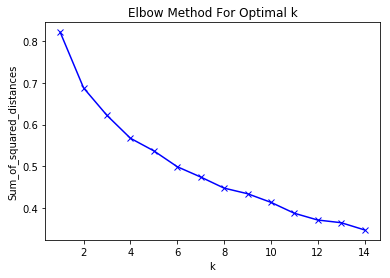

In [80]:
import matplotlib.pyplot as plt

nj_grouped_clustering = nj_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []

#determine optimal k 
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nj_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

f = plt.figure()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()  
f.savefig("elbow.png", bbox_inches='tight', dpi=600)


In [81]:
# The code was removed by Watson Studio for sharing.

In [82]:
#Optimal k using elbow method is 5
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nj_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 3, 4, 3, 4, 4, 1, 1], dtype=int32)

In [83]:
# add clustering labels
nvs = neighborhoods_venues_sorted
nvs.insert(0, 'Cluster Labels', kmeans.labels_)
nj_merged = counties
# merge nj_grouped with counties o add latitude/longitude for each neighborhood
nj_merged = nj_merged.join(nvs.set_index('Neighborhood'), on='Neighborhood')

nj_merged.head() # check the last columns!

Zip            City County AreaCode  Latitude  Longitude  \
8   07063  Plainfield, NJ  Union      908   40.6048   -74.4427   
7   07065      Rahway, NJ  Union      732   40.6087   -74.2819   
10  07060  Plainfield, NJ  Union      908   40.6152   -74.4150   
12  07066       Clark, NJ  Union      908   40.6203   -74.3106   
9   07062  Plainfield, NJ  Union      908   40.6323   -74.3997   

            Neighborhood  Cluster Labels 1st Most Common Venue  \
8   Plainfield, NJ 07063               0     Convenience Store   
7       Rahway, NJ 07065               0     Convenience Store   
10  Plainfield, NJ 07060               0     Convenience Store   
12       Clark, NJ 07066               4              Pharmacy   
9   Plainfield, NJ 07062               0     Convenience Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
8               Pharmacy        Discount Store          Home Service   
7               Pharmacy          Home Service          Liquor Store   
10              Pharmacy        Discount Store          Liquor Store   
12     Convenience Store         Grocery Store      Business Service   
9           Liquor Store      Department Store              Pharmacy   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
8   Construction & Landscaping     Electronics Store          Liquor Store   
7                    Pet Store         Big Box Store         Event Service   
10  Construction & Landscaping           Supermarket     Electronics Store   
12                Liquor Store                Lawyer          Home Service   
9   Construction & Landscaping           Supermarket         Grocery Store   

         8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
8            Mobile Phone Shop  Furniture / Home Store         Shipping Store  
7               Shipping Store          Discount Store             Smoke Shop  
10           Mobile Phone Shop               Pet Store       Business Service  
12  Construction & Landscaping               Gift Shop            Flower Shop  
9               Discount Store       Mobile Phone Shop      Other Repair Shop

In [92]:
nj_merged.sort_values('Cluster Labels')

Zip                  City County AreaCode  Latitude  Longitude  \
8   07063        Plainfield, NJ  Union      908   40.6048   -74.4427   
11  07061        Plainfield, NJ  Union      908   40.6657   -74.2997   
29  07204      Roselle Park, NJ  Union      908   40.6651   -74.2670   
28  07202         Elizabeth, NJ  Union      908   40.6565   -74.2215   
3   07083             Union, NJ  Union      908   40.6952   -74.2677   
5   07033        Kenilworth, NJ  Union      908   40.6759   -74.2944   
1   07109        Belleville, NJ  Essex      973   40.7946   -74.1631   
30  07922  Berkeley Heights, NJ  Union      908   40.6752   -74.4346   
1   07036            Linden, NJ  Union      908   40.6354   -74.2556   
9   07062        Plainfield, NJ  Union      908   40.6323   -74.3997   
3   07110            Nutley, NJ  Essex      973   40.8185   -74.1589   
10  07060        Plainfield, NJ  Union      908   40.6152   -74.4150   
7   07065            Rahway, NJ  Union      732   40.6087   -74.2819   
21  07023           Fanwood, NJ  Union      908   40.6419   -74.3868   
42  07040         Maplewood, NJ  Essex      973   40.7279   -74.2656   
7   07103            Newark, NJ  Essex      973   40.7370   -74.1964   
10  07106            Newark, NJ  Essex      973   40.7415   -74.2330   
38  07079      South Orange, NJ  Essex      973   40.7465   -74.2575   
23  07101            Newark, NJ  Essex      973   40.7361   -74.2251   
9   07104            Newark, NJ  Essex      973   40.7664   -74.1695   
6   07107            Newark, NJ  Essex      973   40.7607   -74.1882   
5   07111         Irvington, NJ  Essex      973   40.7261   -74.2313   
24  07019       East Orange, NJ  Essex      973   40.7673   -74.2049   
30  07017       East Orange, NJ  Essex      973   40.7696   -74.2077   
35  07052       West Orange, NJ  Essex      973   40.7859   -74.2568   
16  07198            Newark, NJ  Essex      973   40.7918   -74.2452   
25  07003        Bloomfield, NJ  Essex      973   40.8035   -74.1891   
31  07018       East Orange, NJ  Essex      973   40.7558   -74.2198   
17  07088          Vauxhall, NJ  Union      908   40.7179   -74.2829   
2   07108            Newark, NJ  Essex      973   40.7236   -74.2015   
4   07112            Newark, NJ  Essex      973   40.7107   -74.2131   
27  07203           Roselle, NJ  Union      908   40.6530   -74.2610   
26  07205          Hillside, NJ  Union      908   40.6968   -74.2281   
40  07050            Orange, NJ  Essex      973   40.7692   -74.2355   
11  07105            Newark, NJ  Essex      973   40.7271   -74.1563   
19  07114            Newark, NJ  Essex      973   40.7082   -74.1891   
8   07102            Newark, NJ  Essex      973   40.7320   -74.1765   
12  07193            Newark, NJ  Essex      973   40.7357   -74.1724   
22  07207         Elizabeth, NJ  Union      908   40.6640   -74.2107   
25  07208         Elizabeth, NJ  Union      908   40.6747   -74.2239   
15  07201         Elizabeth, NJ  Union      908   40.6717   -74.2043   
32  07009       Cedar Grove, NJ  Essex      973   40.8534   -74.2297   
23  07206     Elizabethport, NJ  Union      908   40.6501   -74.1871   
27  07039        Livingston, NJ  Essex      973   40.7896   -74.3202   
18  07902            Summit, NJ  Union      908   40.7156   -74.3647   
19  07901            Summit, NJ  Union      908   40.7149   -74.3642   
29  07004         Fairfield, NJ  Essex      973   40.8822   -74.2960   
24  07974    New Providence, NJ  Union      908   40.7004   -74.4023   
39  07078       Short Hills, NJ  Essex      973   40.7368   -74.3271   
33  07006          Caldwell, NJ  Essex      973   40.8545   -74.2789   
41  07041          Millburn, NJ  Essex      973   40.7228   -74.3015   
45  07043         Montclair, NJ  Essex      973   40.8430   -74.2011   
34  07007          Caldwell, NJ  Essex      973   40.8398   -74.2765   
44  07044            Verona, NJ  Essex      973   40.8319   -74.2428   
26  07021       Essex Fells, NJ  Essex      97

The frequency of lawyer venues was

In [86]:
nj_merged_with_frequency = nj_merged.join(nj_grouped[['Neighborhood', 'Lawyer']].set_index('Neighborhood'), on='Neighborhood')
nj_merged_with_frequency.rename(columns={"Lawyer":"Lawyer Frequency"},inplace=True)


In [88]:
max_cluster = nj_merged_with_frequency[nj_merged_with_frequency['Cluster Labels']==max_frequency_cluster].sort_values('Lawyer Frequency')
max_cluster
lowest_frequency_in_max_cluster = pd.DataFrame(max_cluster.iloc[0]).transpose()
lowest_frequency_in_max_cluster

Zip        City County AreaCode Latitude Longitude      Neighborhood  \
19  07114  Newark, NJ  Essex      973  40.7082  -74.1891  Newark, NJ 07114   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
19              2      Business Service          Liquor Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
19     Convenience Store     Electronics Store          Home Service   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
19        Discount Store        Cosmetics Shop        Clothing Store   

   9th Most Common Venue 10th Most Common Venue Lawyer Frequency  
19             Bookstore      Mobile Phone Shop             0.03

In [40]:
nj_merged_with_frequency.head()

Zip            City County AreaCode  Latitude  Longitude  \
8   07063  Plainfield, NJ  Union      908   40.6048   -74.4427   
7   07065      Rahway, NJ  Union      732   40.6087   -74.2819   
10  07060  Plainfield, NJ  Union      908   40.6152   -74.4150   
12  07066       Clark, NJ  Union      908   40.6203   -74.3106   
9   07062  Plainfield, NJ  Union      908   40.6323   -74.3997   

            Neighborhood  Cluster Labels 1st Most Common Venue  \
8   Plainfield, NJ 07063               2     Convenience Store   
7       Rahway, NJ 07065               2     Convenience Store   
10  Plainfield, NJ 07060               2     Convenience Store   
12       Clark, NJ 07066               2              Pharmacy   
9   Plainfield, NJ 07062               1     Convenience Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
8               Pharmacy        Discount Store          Home Service   
7               Pharmacy          Home Service          Liquor Store   
10              Pharmacy        Discount Store          Liquor Store   
12     Convenience Store         Grocery Store      Business Service   
9           Liquor Store      Department Store              Pharmacy   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
8   Construction & Landscaping     Electronics Store          Liquor Store   
7                    Pet Store         Big Box Store         Event Service   
10  Construction & Landscaping           Supermarket     Electronics Store   
12                Liquor Store                Lawyer          Home Service   
9   Construction & Landscaping           Supermarket         Grocery Store   

         8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  \
8            Mobile Phone Shop  Furniture / Home Store         Shipping Store   
7               Shipping Store          Discount Store             Smoke Shop   
10           Mobile Phone Shop               Pet Store       Business Service   
12  Construction & Landscaping               Gift Shop            Flower Shop   
9               Discount Store       Mobile Phone Shop      Other Repair Shop   

    Lawyer Frequency  
8               0.01  
7               0.01  
10              0.01  
12              0.05  
9               0.01

In [91]:
nj_merged_with_frequency.to_pickle("nj_merged_with_frequency.pickle")

In [92]:
import os
display(os.getcwd())
os.listdir()


'/home/dsxuser/work'

['nj_merged_with_frequency.pickle', 'updated-file.json']

In [93]:
# The code was removed by Watson Studio for sharing.

NameError: name 'nj_merged_with_frequency' is not defined